# **Dataset Loading...**

In [221]:
import sklearn.datasets as datasets
import pandas as pd

# Loading the iris dataset
iris=datasets.load_iris()

# Forming the iris dataframe
df=pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head(5))

y=iris.target
print(y)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [222]:
x = pd.read_csv("/content/drive/My Drive/Internship/Iris (1).csv")

x.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


In [223]:
df = df.drop(['sepal width (cm)'],axis=1)

In [224]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2 ,random_state=42)

# Decision Tree Algorithm

In [225]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(random_state=42, max_depth=4)
dtree.fit(df,y)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


In [226]:
y_pred = dtree.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred) *100)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

100.0


### Let us visualize the Decision Tree to understand it better.



In [227]:
import pickle

with open('/content/drive/My Drive/Internship/model.pck', 'wb') as f:
    pickle.dump(dtree,f)

In [228]:
# Install required libraries
#!pip install pydotplus
#!apt-get install graphviz -y

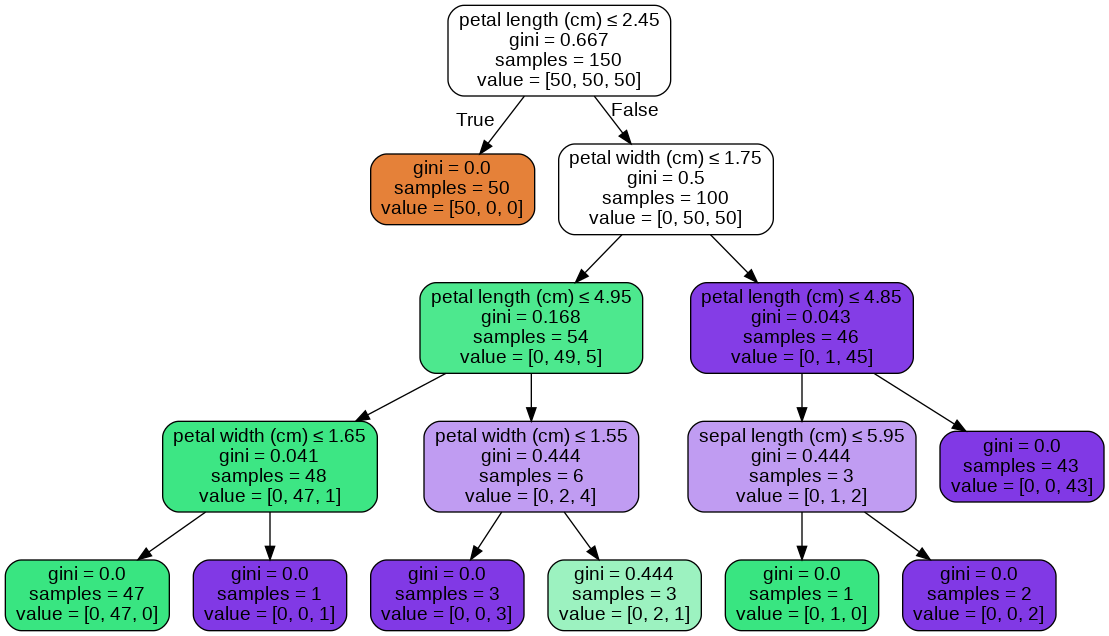

In [229]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

fn = ['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']
# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=fn,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**You can now feed any new/test data to this classifer and it would be able to predict the right class accordingly.**

In [231]:
s_length = input("sepal length (cm) :")
p_length= input("petal length (cm) :")
p_width = input("petal width (cm) :")

iris_feature = [s_length , p_length, p_width]
import pickle

with open('/content/drive/My Drive/Internship/model.pck', 'rb') as f:
    dtree = pickle.load(f)

iris_flower = dtree.predict([iris_feature])
print(iris_flower)
if (iris_flower==0):
  print("Iris-setosa")
elif (iris_flower==1):
  print("Iris-versicolor")
elif (iris_flower==2):
  print("Iris-virginica")

sepal length (cm) :5.1
petal length (cm) :1.4
petal width (cm) :0.2
[0]
Iris-setosa
